# 时间序列
## 语言
python

## 库
statsmodels

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot

In [2]:
def getCountByZone(file):
    df = pd.read_excel(file)
    house = df[df['用　　途']=='普通住宅']
    columns = [
        # '所在区县',
        # '成交公司', 
        '成交单价'
    ]
    # groupByZone = house.groupby(['所在区县', '街道(或小区)'])
    groupByZone = house.groupby(['所在区县'])
    # groupByZone[columns].agg(['mean', 'count']).loc[:]
    dict = {}
    for name, group in groupByZone:
        dict[name] = group[columns].agg('count').values[0]
    return dict

In [3]:
data = {}
month = []
for n in range(12):
    month.append('%d月' % (n + 1))
    monthData = getCountByZone('./data/%d.xlsx' % (202000 + (1+n)))
    for zone in monthData:
        arr = data.get(zone, np.zeros(12))
        arr[n] = monthData[zone]
        data[zone] = arr


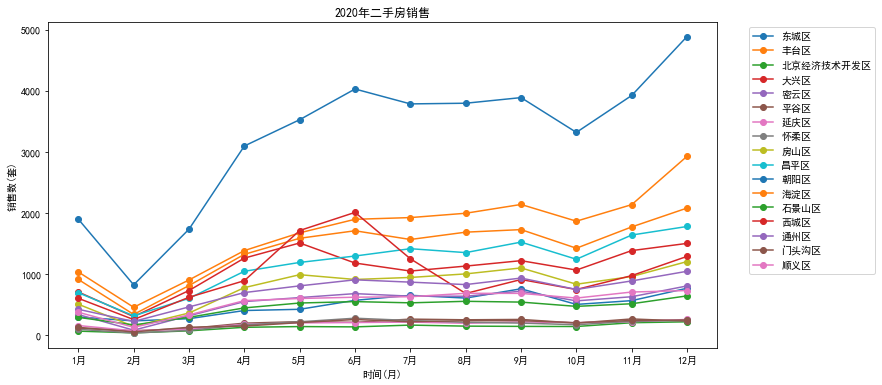

In [4]:
plt.rcParams['font.family'] = ['SimHei']  # 中文字体设置
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(15, 6))
for zone in data:
    ax.plot(month, data[zone], '-o', label=zone)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend( bbox_to_anchor=(1.04, 1))
plt.xlabel('时间(月)')
plt.ylabel('销售数(套)')
plt.title('2020年二手房销售')
plt.show()